<a href="https://colab.research.google.com/github/AkshayBiju123/ATM/blob/main/C119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

One of the most commonly used Machine Learning Algorithm is the Decision Tree, which is a flow chart like structure that leads us to an outcome based on the data and the decisions it takes. A typical decision tree diagram (flow chart) looks like this -

\
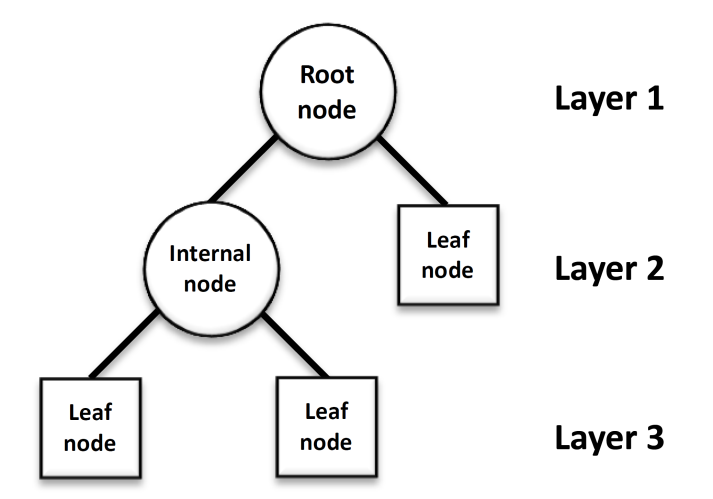

# Understanding the decision tree

Here, if we look at this closely, we can see that it has a tree like structure. Have you seen this type of a structure before? Of course, we have family trees that look exactly like this.

\
Here are the following components of a decision tree -


*   **Root Node -** The root node is the one which represents the entire population. This is the point from where the population gets divided into 2 or more groups.
*   **Internal Node -** An internal node is again like the root node, but it does not contain the entire population. We further divide our data into more groups from here.
*   **Leaf Node -** A leaf node is the one that represents the final outcome.

\
Let's understand this with an example.

\
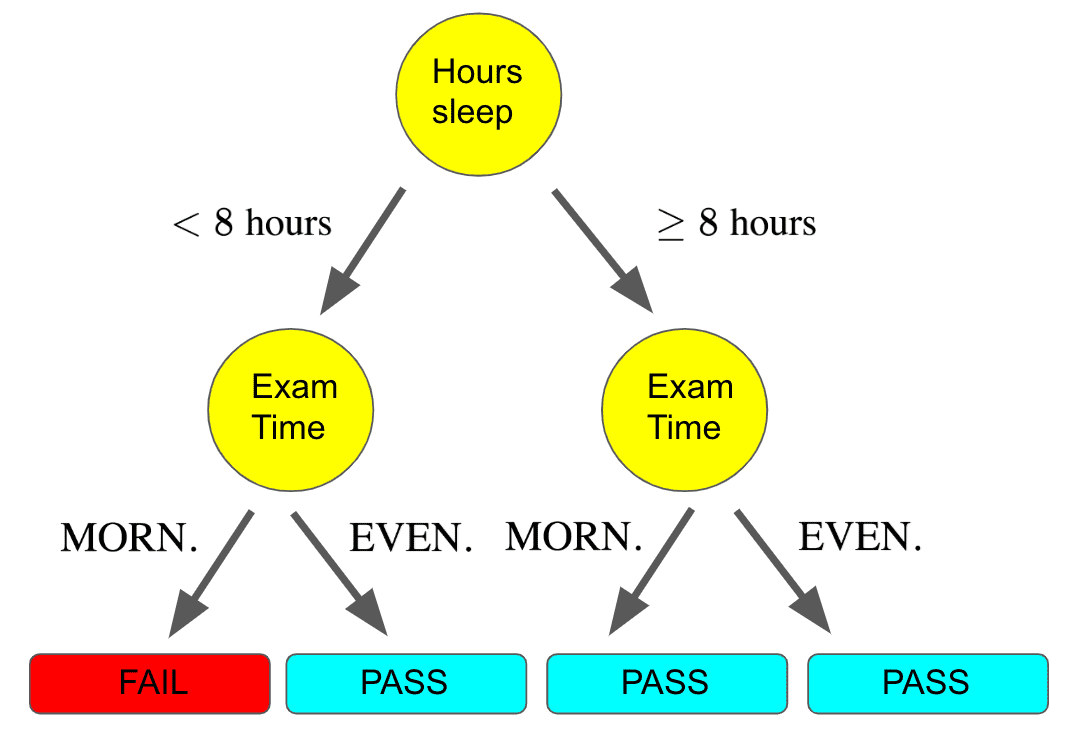





Here, if we try to see the example above, We can say that the root node has all the population. It decides to split the data based on the number of hours of sleep.

\
After splitting the data, It has the internal nodes as the population of the students who slept for less than 8 hours on the **left** and the students who slept for more than or equal to 8 hours on the **right**.

\
Now it further splits the population more based on the time of their exam, if it is in the morning or in the evening.

\
Based on the analysis from this decision tree, we can say that a student who sleeps for less than 8 hours and has their exam in the morning would fail.

\
Easy, isn't it? But how does this algorithm works?

# Decision Tree Algorithm

The first thing that would come in mind is that, how do we split the data? What is the best metric to split the data? In the example above, why did we not split the data based on the time of the exam from the root node, rather than splitting it based on the number of hours of sleep?

\
For this, we have something known as **Attribute Selection Measures** or **ASM** which we use to split the data.

\
### Attribute Selection Measures

It is used for selecting the splitting criteria that splits data in the best possible manner. It provides a **rank** to each feature by explaining the given dataset. The feature with the best score gets selected as the splitting attribute.

\
Next, based on the feature that is selected, our algorithm would split the data into 2 or more groups.

\
It starts building a tree structure by repeating this process recursively for each child (or Internal Node) until it reached a final output following all the paths in the flow chart.

\
Now let's dive into some coding! The first thing we'll do is to upload the CSV.

In [3]:
!pip install --upgrade scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 5.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.


In [6]:

#Uploading the csv
from google.colab import files
data_to_load = files.upload()

Saving C119.csv to C119 (1).csv


Now let's quickly create a dataframe and use it to create a machine learning model for Decision Tree.

In [7]:
import pandas as pd

#Column Name
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv("C119.csv", names=col_names).iloc[1:]

print(df.head())

  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


### Select the features

In [8]:
features = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[features]
y = df.label

### Splitting the data into training and testing and fitting it in the model

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#splitting data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Initialising the Decision Tree Model
clf = DecisionTreeClassifier()

#Fitting the data into the model
clf = clf.fit(X_train,y_train)

#Calculating the accuracy of the model
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


# Visualising the Decision Tree

Now that we have have built a decision tree model, that can predict with an accuracy score of 0.67 if a person has diabetes or not based on their data, is there a way we can visualise it?

\
There sure is. Let's see how!

\
## Fun Fact

To create a visualisation for the Decision Tree Classifier we build above, we will use the `export_graphviz` module of python to first convert the data into text that we can read and understand, and then we'll use the `pydotplus` module to convert this text into an image.

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus

dot_data = StringIO() #Where we will store the data from our decision tree classifier as text.

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<glucose &le; 129.5<br/>gini = 0.449<br/>samples = 537<br/>value = [354, 183]<br/>class = 0>, fillcolor="#f2c29f"] ;
1 [label=<bmi &le; 26.3<br/>gini = 0.329<br/>samples = 357<br/>value = [283, 74]<br/>class = 0>, fillcolor="#eca26d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<bmi &le; 9.1<br/>gini = 0.06<br/>samples = 97<br/>value = [94, 3]<br/>class = 0>, fillcolor="#e6853f"] ;
1 -> 2 ;
3 [label=<glucose &le; 114.5<br/>gini = 0.444<br/>samples = 6<br/>value = [4, 2]<br/>class = 0>, fillcolor="#f2c09c"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [4, 0]<br/>class = 0>, fillcolor="#e58139"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 5 ;
6 [label=<pedigree &le; 0.669<br/>gini = 0.022<br/>samples = 91<br/>value = [90, 1]<br/>class = 0>, fillcolor

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Above, we can see how our Decision Tree Classifier got converted into something that we can read and understand. Now, using the `pydotplus`, we will convert this into an image. Let's see how would that look like -

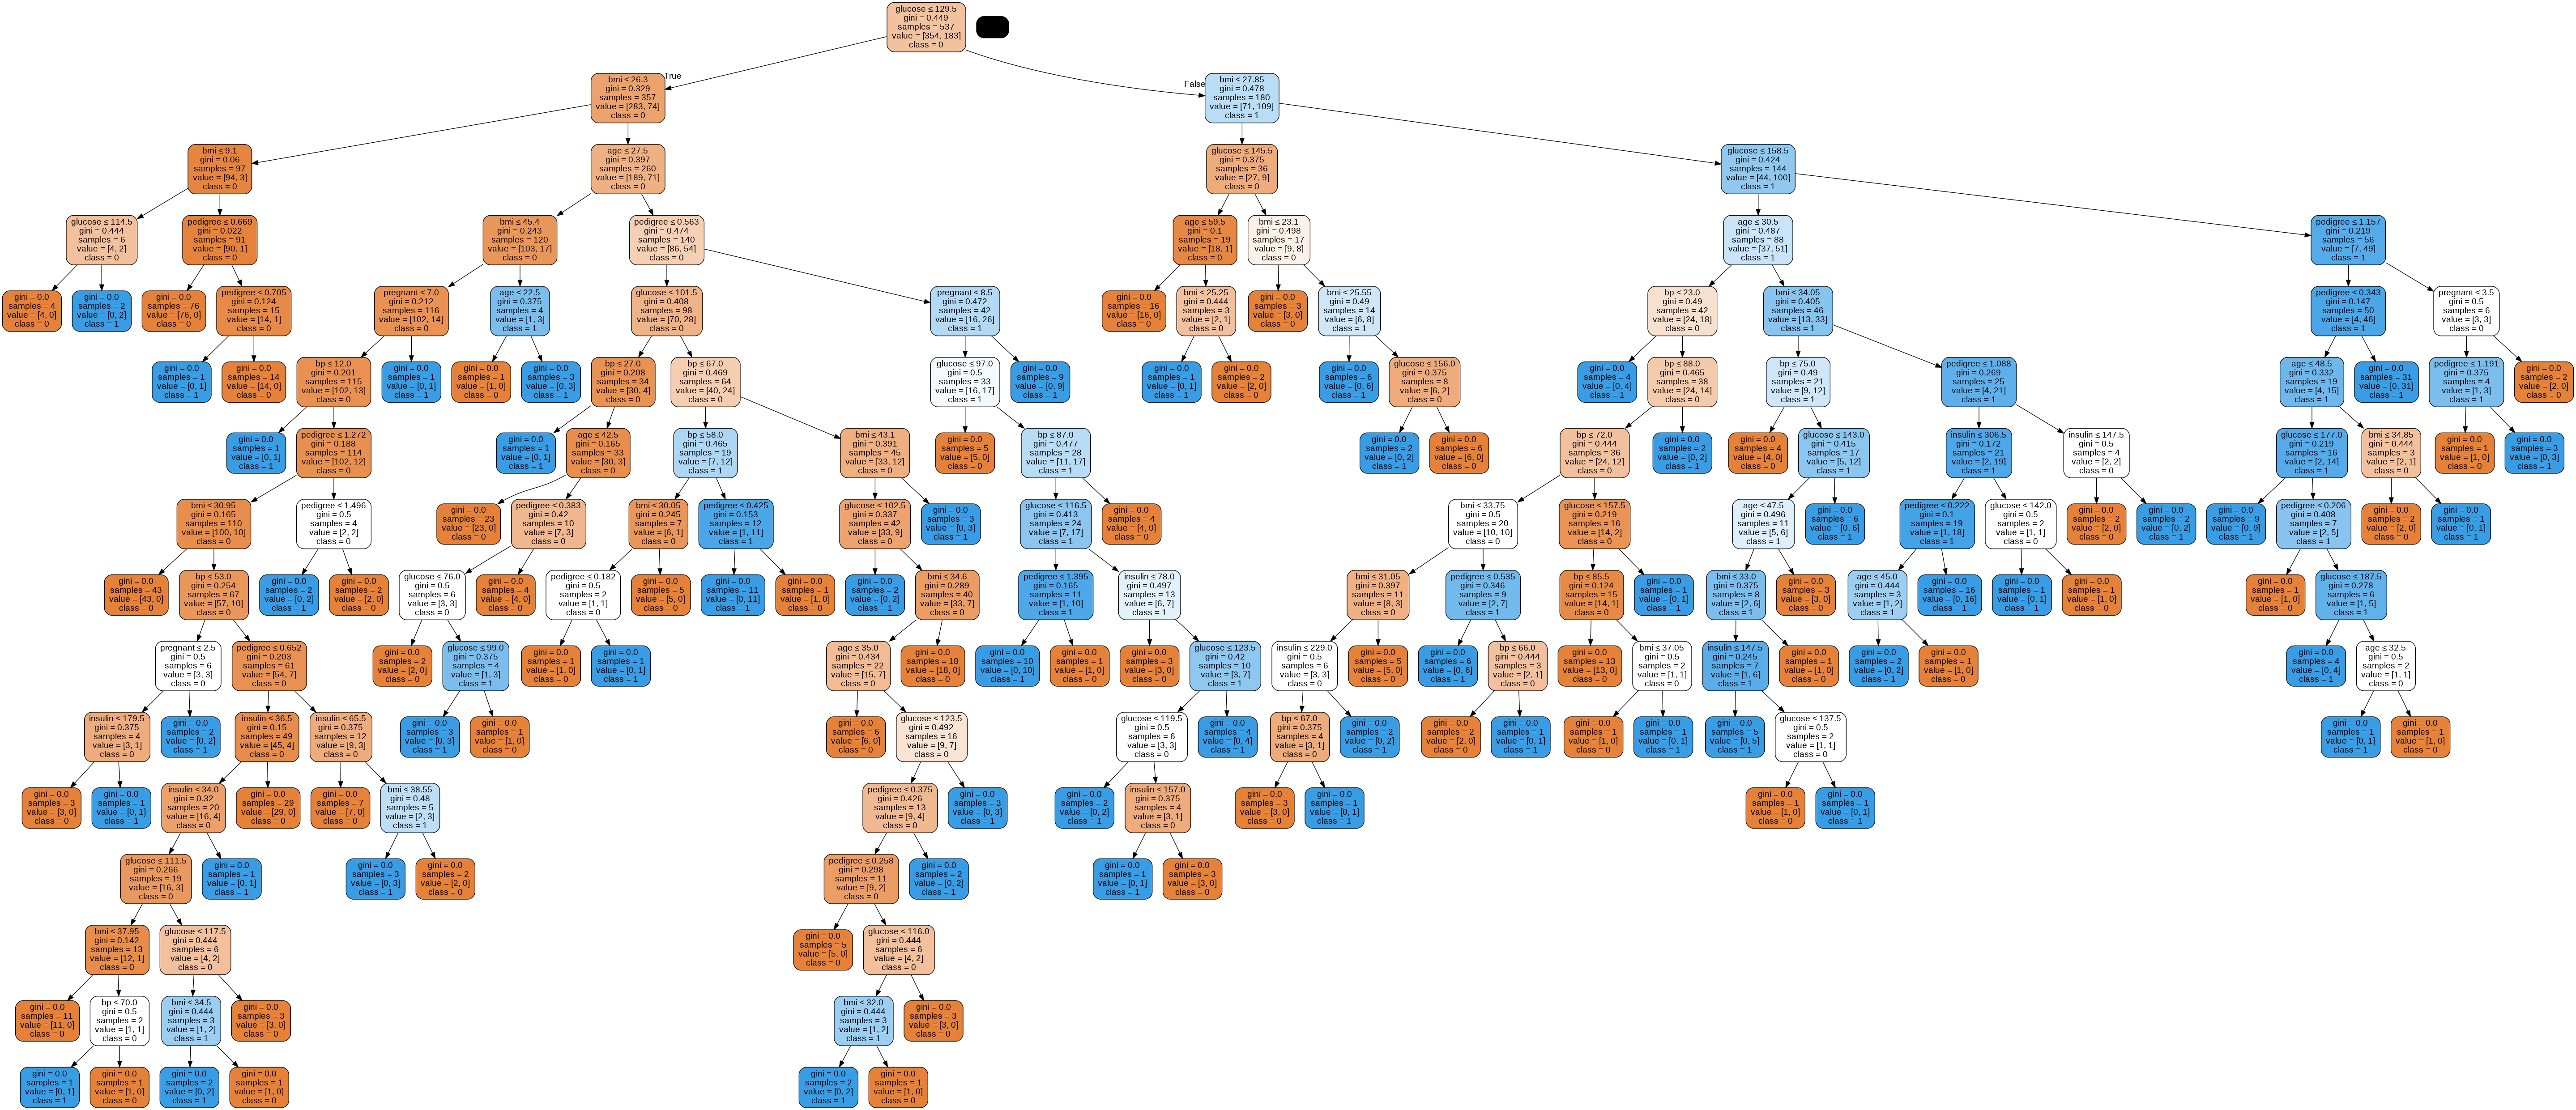

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [36]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7575757575757576


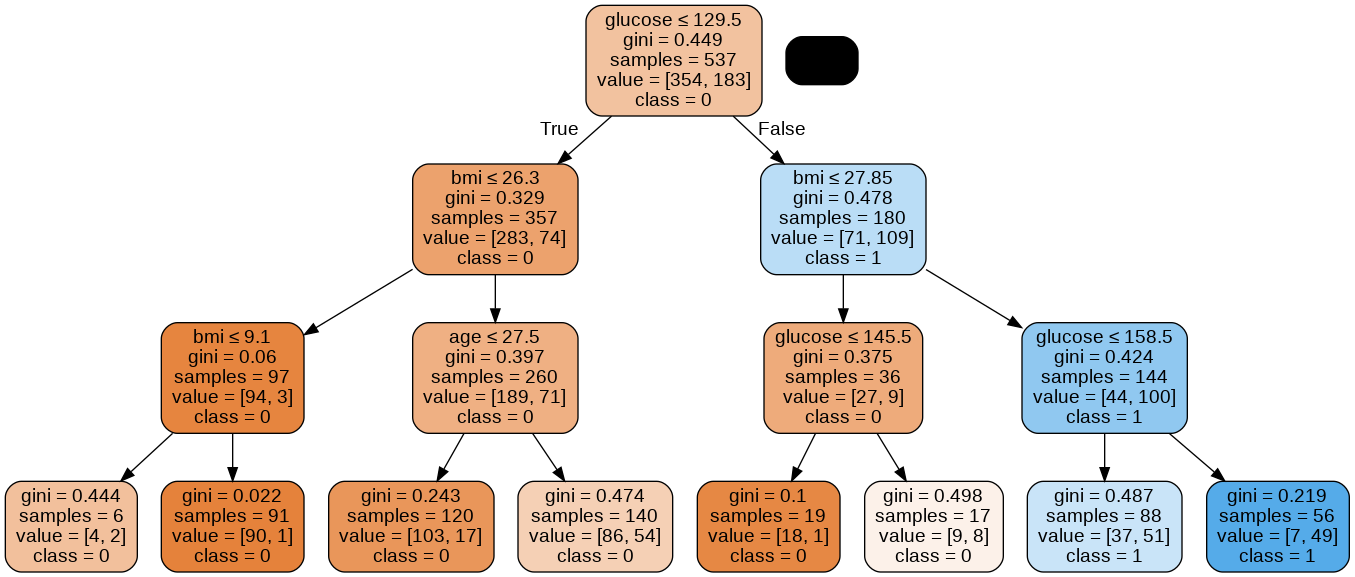

In [37]:
dot_data = StringIO()
export_graphviz(clf,out_file= dot_data, filled = True, rounded = True, special_characters= True, feature_names= features, class_names=["0","1"])

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Diabetes.png")
Image(graph.create_png())